In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [3]:
#Cấu hình đường dẫn
train_dir = '../data/processed_data/'  # Folder chứa ảnh đã xử lý (train, validation)
img_size = (224, 224)  # Kích thước ảnh
batch_size = 32  # Số ảnh mỗi batch
epochs = 20  # Số epoch

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Phân chia 80% train - 20% validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 4018 images belonging to 2 classes.
Found 1004 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\QUYEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stop]
)


c:\Users\QUYEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.6146 - loss: 2.0481 - val_accuracy: 0.8206 - val_loss: 0.6584
Epoch 2/20
  1/125 ━━━━━━━━━━━━━━━━━━━━ 1:18 633ms/step - accuracy: 0.8125 - loss: 0.6772

c:\Users\QUYEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 241ms/step - accuracy: 0.8125 - loss: 0.6772 - val_accuracy: 0.8075 - val_loss: 0.6641
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.7815 - loss: 0.6325 - val_accuracy: 0.7964 - val_loss: 0.5288
Epoch 4/20
  1/125 ━━━━━━━━━━━━━━━━━━━━ 1:14 603ms/step - accuracy: 0.7188 - loss: 0.6262

KeyboardInterrupt: 

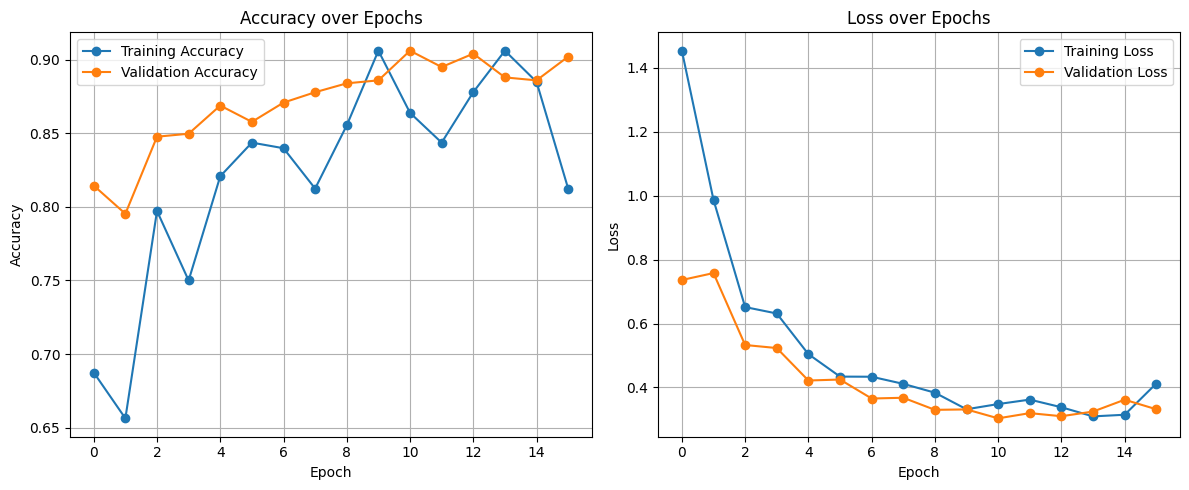

In [18]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
model.save('stroke_detection_cnn.h5')

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1. Load mô hình đã huấn luyện
model = tf.keras.models.load_model('stroke_detection_cnn.h5')

# 2. Định nghĩa kích thước ảnh (phải giống với kích thước ảnh trong quá trình huấn luyện)
img_height, img_width = 224, 224

# 3. Đường dẫn đến ảnh cần dự đoán
img_path = r'D:/Năm 3 - HK2/Dữ liệu lớn/DeepStroke/front-end/assets/image/test_image.jpg'  # Thay đổi đường dẫn đúng ảnh của bạn

# 4. Load & xử lý ảnh
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize ảnh (chia cho 255)

# 5. Dự đoán
prediction = model.predict(img_array)[0][0]

# 6. In kết quả
label = "Stroke" if prediction > 0.5 else "No Stroke"
confidence = prediction if prediction > 0.5 else 1 - prediction

print(f"Predicted: {label} ({confidence*100:.2f}%) - Image: {img_path}")

# 7. Hiển thị ảnh
plt.imshow(img)
plt.title(f"{label} ({confidence*100:.2f}%)")
plt.axis('off')  # Tắt trục tọa độ
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'stroke_detection_cnn.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)